<a href="https://colab.research.google.com/github/isabellaschen/EDA/blob/main/EDA_Credit_History.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

EDA - Credit History

By: Grant Williams, Haowei Zhang, and Isabella Chen

In [66]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
# don't forget to mount Google Drive

application_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/EDA/application_data.csv')
previous_application = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/EDA/previous_application.csv')

Taking a quick look at our data


In [76]:
print('app data shape: ', application_data.shape)
print('prev data shape: ', previous_application.shape)

app data shape:  (307511, 122)
prev data shape:  (1670214, 37)


In [77]:
application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [69]:
previous_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
# target variable (1 - client with payment difficulties, 0 - all other cases)
application_data['TARGET'].value_counts()

,count
TARGET,
0,282686
1,24825


Data Visualization

NAME_CONTRACT_TYPE
Cash loans         0.083459
Revolving loans    0.054783
Name: TARGET, dtype: float64


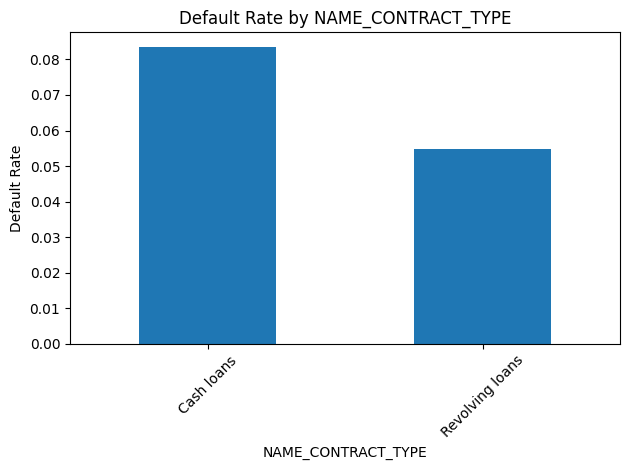

CODE_GENDER
M      0.101419
F      0.069993
XNA    0.000000
Name: TARGET, dtype: float64


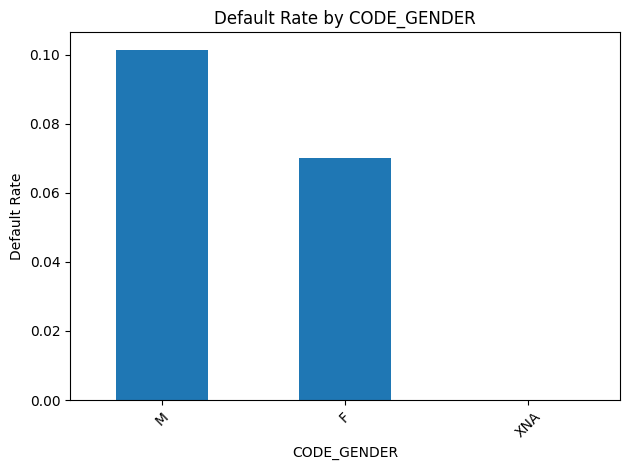

FLAG_OWN_CAR
N    0.085002
Y    0.072437
Name: TARGET, dtype: float64


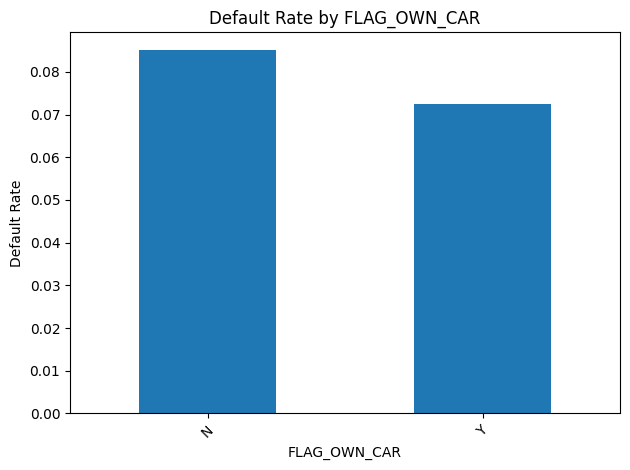

FLAG_OWN_REALTY
N    0.083249
Y    0.079616
Name: TARGET, dtype: float64


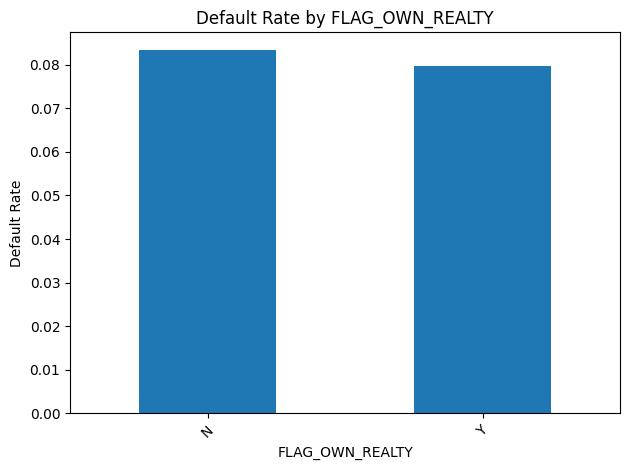

NAME_TYPE_SUITE
Other_B            0.098305
Other_A            0.087760
Group of people    0.084871
Unaccompanied      0.081830
Spouse, partner    0.078716
Family             0.074946
Children           0.073768
Name: TARGET, dtype: float64


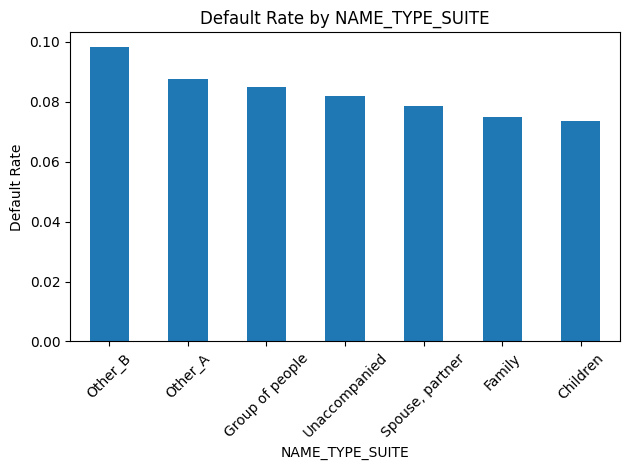

NAME_INCOME_TYPE
Maternity leave         0.400000
Unemployed              0.363636
Working                 0.095885
Commercial associate    0.074843
State servant           0.057550
Pensioner               0.053864
Businessman             0.000000
Student                 0.000000
Name: TARGET, dtype: float64


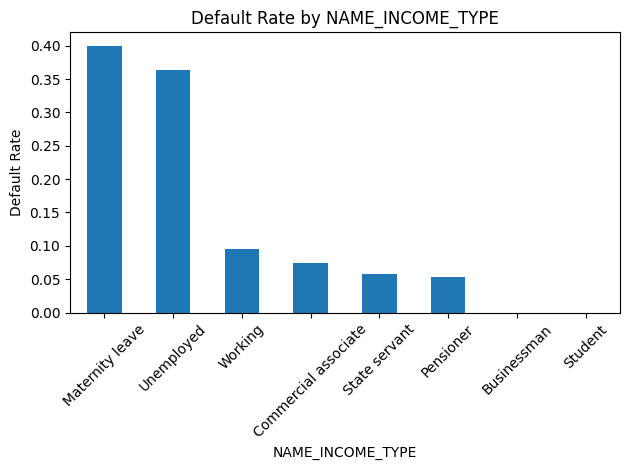

NAME_EDUCATION_TYPE
Lower secondary                  0.109277
Secondary / secondary special    0.089399
Incomplete higher                0.084850
Higher education                 0.053551
Academic degree                  0.018293
Name: TARGET, dtype: float64


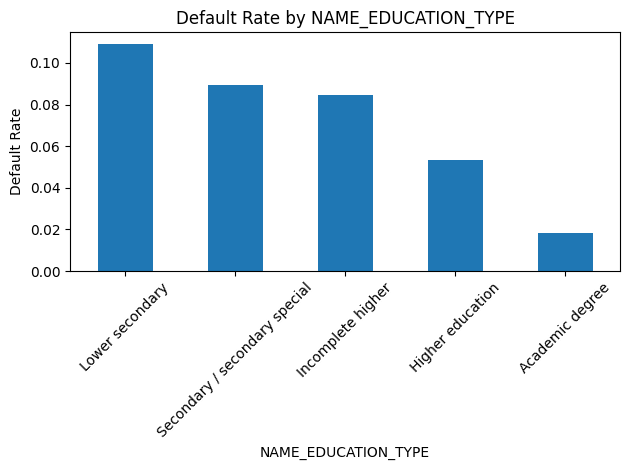

NAME_FAMILY_STATUS
Civil marriage          0.099446
Single / not married    0.098077
Separated               0.081942
Married                 0.075599
Widow                   0.058242
Unknown                 0.000000
Name: TARGET, dtype: float64


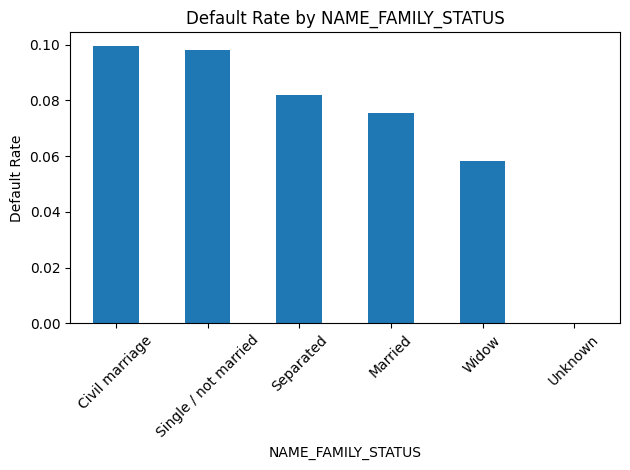

NAME_HOUSING_TYPE
Rented apartment       0.123131
With parents           0.116981
Municipal apartment    0.085397
Co-op apartment        0.079323
House / apartment      0.077957
Office apartment       0.065724
Name: TARGET, dtype: float64


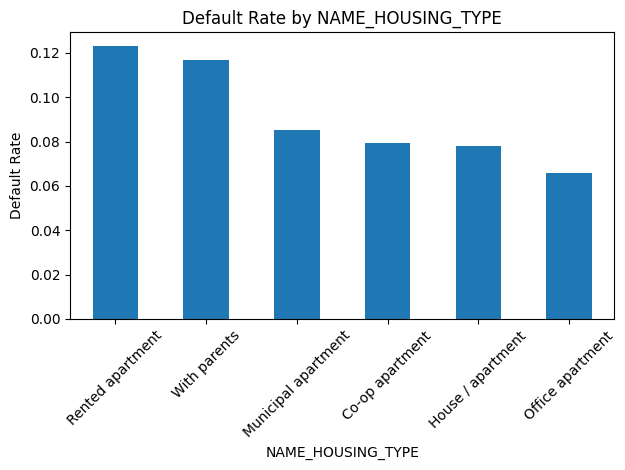

OCCUPATION_TYPE
Low-skill Laborers       0.171524
Drivers                  0.113261
Waiters/barmen staff     0.112760
Security staff           0.107424
Laborers                 0.105788
Cooking staff            0.104440
Sales staff              0.096318
Cleaning staff           0.096067
Realty agents            0.078562
Secretaries              0.070498
Medicine staff           0.067002
Private service staff    0.065988
IT staff                 0.064639
HR staff                 0.063943
Core staff               0.063040
Managers                 0.062140
High skill tech staff    0.061599
Accountants              0.048303
Name: TARGET, dtype: float64


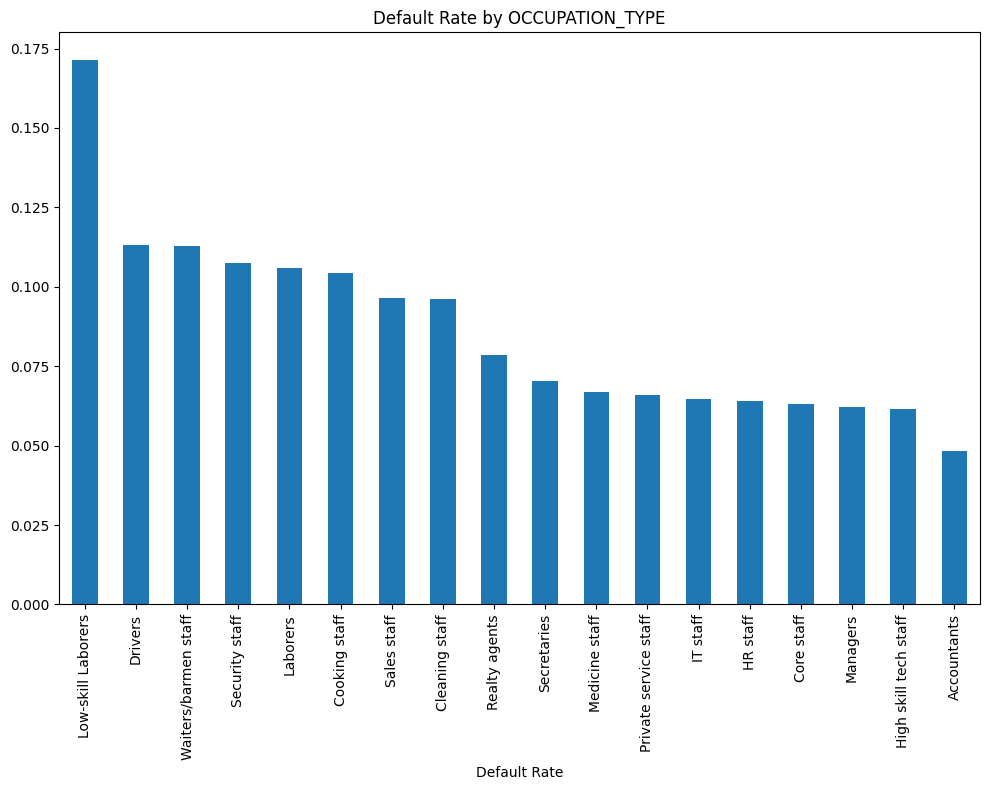

WEEKDAY_APPR_PROCESS_START
TUESDAY      0.083505
WEDNESDAY    0.081604
FRIDAY       0.081469
THURSDAY     0.081003
SUNDAY       0.079291
SATURDAY     0.078873
MONDAY       0.077572
Name: TARGET, dtype: float64


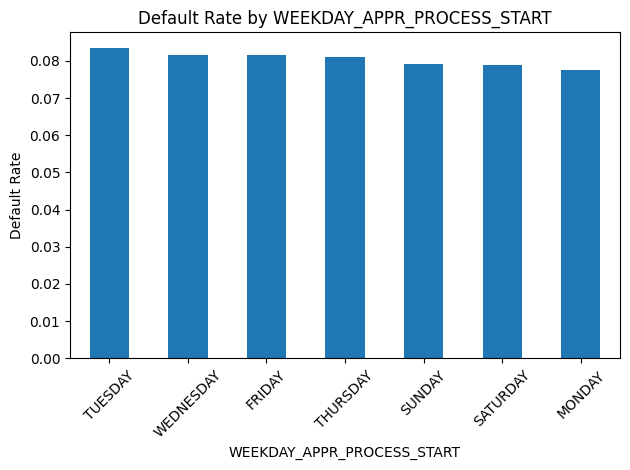

ORGANIZATION_TYPE
Transport: type 3         0.157540
Industry: type 13         0.134328
Industry: type 8          0.125000
Restaurant                0.117062
Construction              0.116798
Cleaning                  0.111538
Industry: type 1          0.110683
Industry: type 3          0.106162
Realtor                   0.106061
Agriculture               0.104727
Trade: type 3             0.103379
Self-employed             0.101739
Industry: type 4          0.101482
Security                  0.099784
Trade: type 7             0.094496
Business Entity Type 3    0.092996
Transport: type 4         0.092812
Mobile                    0.091483
Trade: type 1             0.089080
Industry: type 11         0.086538
Business Entity Type 2    0.085284
Postal                    0.084376
Advertising               0.081585
Business Entity Type 1    0.081384
Industry: type 7          0.080337
Housing                   0.079446
Legal Services            0.078689
Transport: type 2         0.078040
Ot

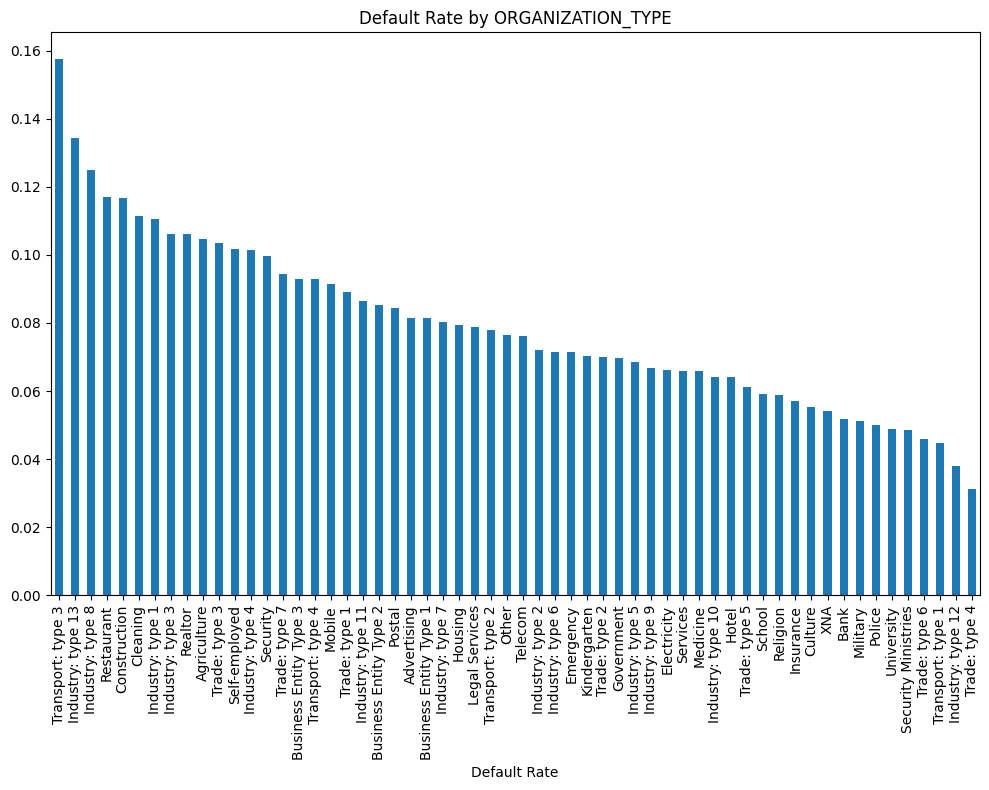

FONDKAPREMONT_MODE
not specified            0.075435
reg oper account         0.069782
reg oper spec account    0.065563
org spec account         0.058195
Name: TARGET, dtype: float64


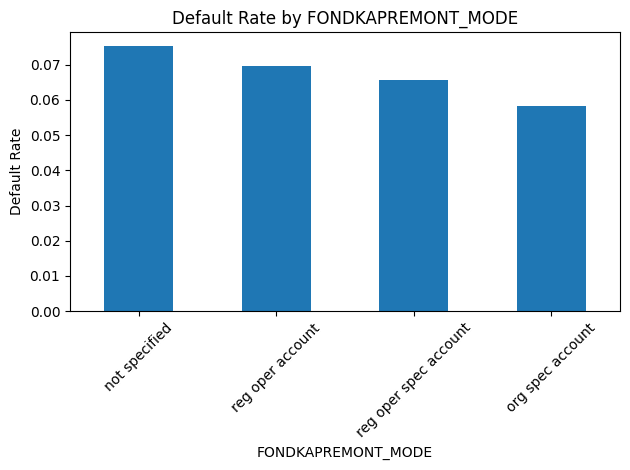

HOUSETYPE_MODE
specific housing    0.101401
terraced house      0.084983
block of flats      0.069434
Name: TARGET, dtype: float64


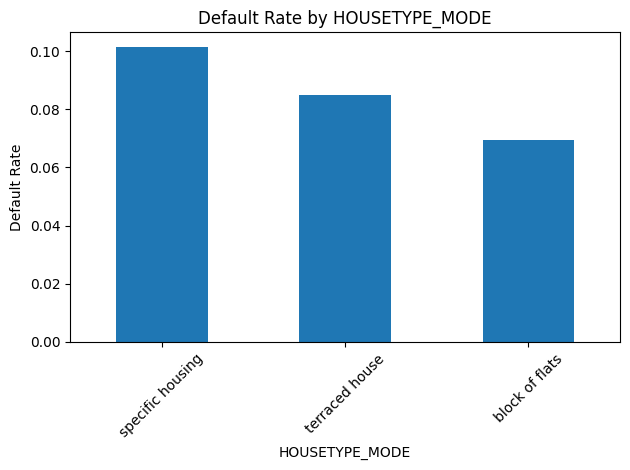

WALLSMATERIAL_MODE
Wooden          0.096979
Others          0.083077
Mixed           0.075348
Stone, brick    0.074057
Block           0.070247
Panel           0.063477
Monolithic      0.047218
Name: TARGET, dtype: float64


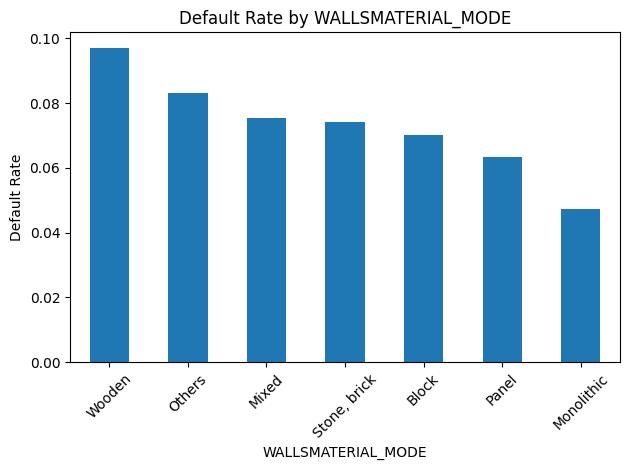

EMERGENCYSTATE_MODE
Yes    0.095790
No     0.069649
Name: TARGET, dtype: float64


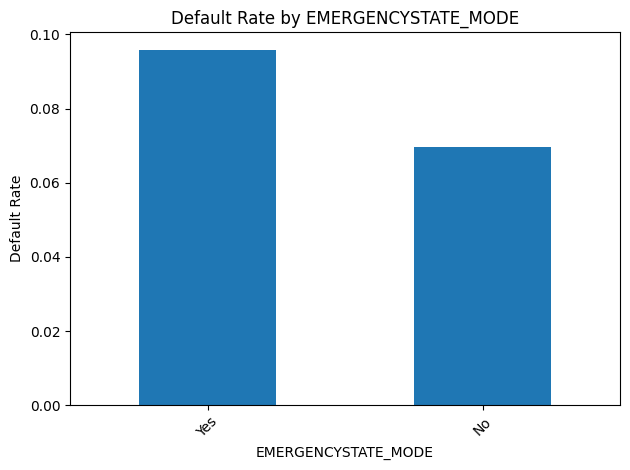

In [70]:
# Categorical Exploration by Target

# use this to get the top categorical variables that correlate the most with 'TARGET'
app_categorical_df = application_data.select_dtypes(include='object')

# create for loop for each categorical column
for col in app_categorical_df:
  # calculate default rate as for each category
  default_rate = application_data.groupby(col)['TARGET'].mean().sort_values(ascending=False)
  print(default_rate)

  # some categories have way too many values
  # make graph bigger if there are more than 10 categories, regular size if not
  if len(default_rate) > 10:
    default_rate.plot(kind='bar', figsize=(10, 8))
    plt.xlabel('Default Rate')
  else:
    default_rate.plot(kind='bar')
    plt.ylabel('Default Rate')
    plt.xticks(rotation=45)

  # label title for each grpah using f-string
  plt.title(f'Default Rate by {col}')
  # make everything fit
  plt.tight_layout()
  # show plot
  plt.show()


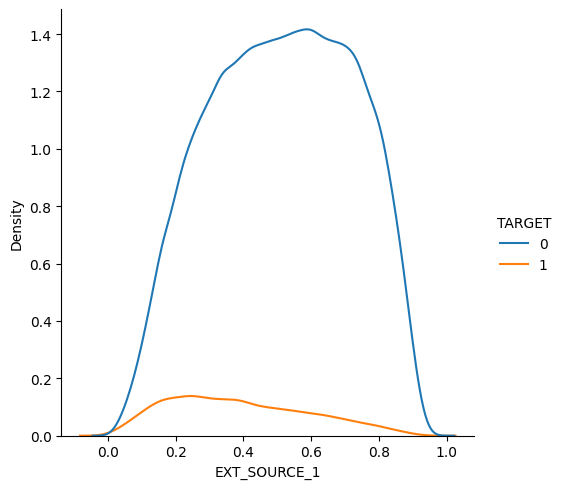

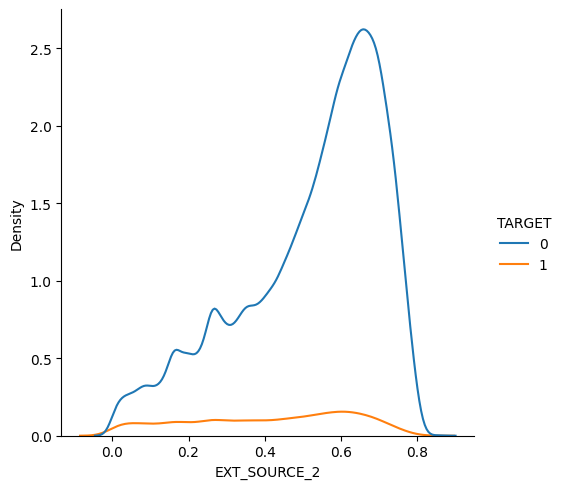

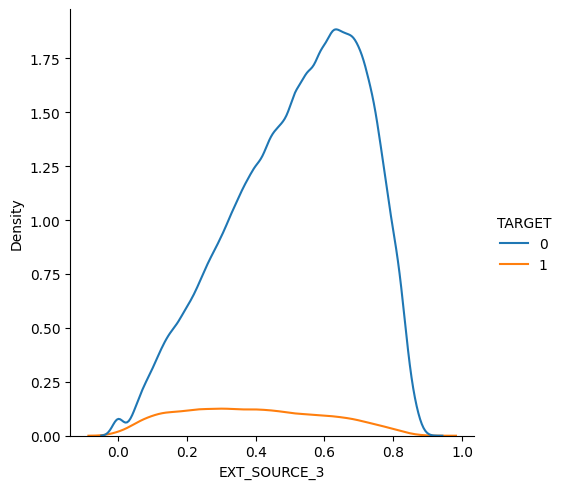

In [71]:
# Bureau Scores

# create list with the columns related to scores given by bureaus
ext_scores = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']

# create a for loop for each source
for score in ext_scores:
  # create a kde graph with the score as x-axis, distinguished by our target variable
    sns.displot(data = application_data, x = score, hue = 'TARGET', kind = 'kde')

<Axes: xlabel='NAME_CONTRACT_TYPE', ylabel='count'>

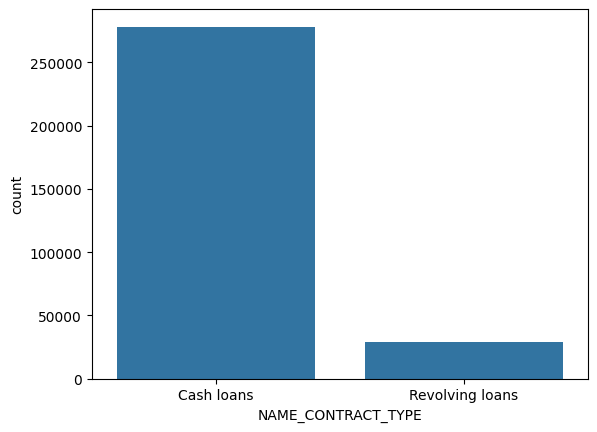

In [72]:
# Loan Application Types

# create count graph of type of loan application
sns.countplot(data = application_data, x="NAME_CONTRACT_TYPE")

NAME_CONTRACT_STATUS  SK_ID_CURR  Approved  Canceled  Refused  Unused offer
0                         100001         1         0        0             0
1                         100002         1         0        0             0
2                         100003         3         0        0             0
3                         100004         1         0        0             0
4                         100005         1         1        0             0
...                          ...       ...       ...      ...           ...
338852                    456251         1         0        0             0
338853                    456252         1         0        0             0
338854                    456253         2         0        0             0
338855                    456254         2         0        0             0
338856                    456255         6         0        2             0

[338857 rows x 5 columns]
NAME_CONTRACT_STATUS  SK_ID_CURR  Approved  Canceled  Refused

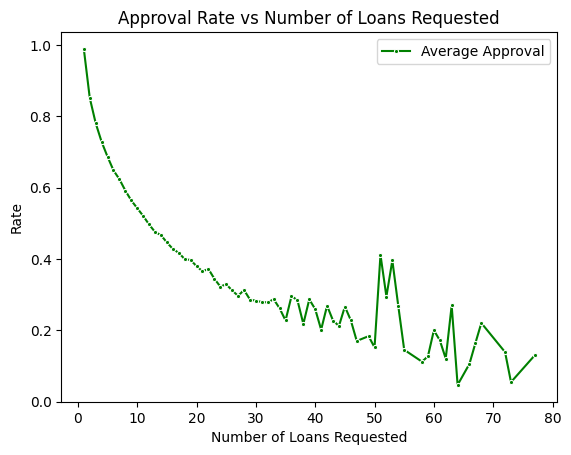

In [73]:
# Approval Rate by Number of Applicant's Requested Loans

# count number of previous loans' statuses per applicant, unstack status index to columns
client_status = previous_application.groupby('SK_ID_CURR')['NAME_CONTRACT_STATUS'].value_counts().unstack(fill_value = 0).reset_index()
print(client_status)

# calculate applicant's total previous loans as 'NUM_PREV_LOANS'
client_status['NUM_PREV_LOANS'] = client_status.sum(axis = 1) - client_status['SK_ID_CURR']
# calculate applicant's approval rate as 'APPROVAL_RATE'
client_status['APPROVAL_RATE'] = client_status.get('Approved', 0) / client_status['NUM_PREV_LOANS']
print(client_status)

# calculate average approval rate by number of previous loans
loan_data = client_status.groupby('NUM_PREV_LOANS')['APPROVAL_RATE'].mean().reset_index()
print(loan_data)


# plot

# create lineplot with x-axis as number of previous loans, y-axis as approval rate. label as 'average approval' and make the line green
sns.lineplot(data = loan_data, x = 'NUM_PREV_LOANS', y = 'APPROVAL_RATE', label = 'Average Approval', marker = '.', color = 'green')
# label x-axis as 'Number of Loans Requested'
plt.xlabel("Number of Loans Requested")
# label y-axis as 'Rate'
plt.ylabel("Rate")
# label title as 'Approval Rate vs Number of Loans Requested'
plt.title("Approval Rate vs Number of Loans Requested")
# show plot
plt.show()

NAME_CONTRACT_TYPE
Cash loans         747553
Consumer loans     729151
Revolving loans    193164
XNA                   346
Name: SK_ID_CURR, dtype: int64
['Approved' 'Refused' 'Canceled' 'Unused offer']
NAME_CONTRACT_TYPE
Cash loans         165928
Consumer loans      75185
Revolving loans     49534
XNA                    31
Name: SK_ID_CURR, dtype: int64
NAME_CONTRACT_TYPE
Revolving loans    0.256435
Cash loans         0.221962
Consumer loans     0.103113
XNA                0.089595
Name: SK_ID_CURR, dtype: float64


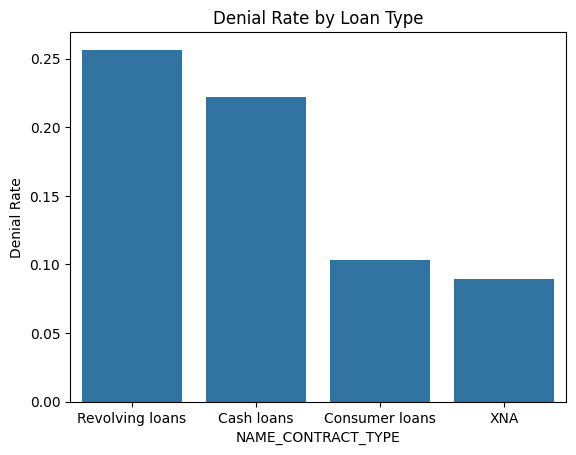

In [74]:
# Total Loans by Denial Rate

# count total loan applications for each type
total_loans = previous_application.groupby('NAME_CONTRACT_TYPE')['SK_ID_CURR'].count()
print(total_loans)

# view possible contract statuses
print(previous_application['NAME_CONTRACT_STATUS'].unique())

# count number of denied applications for each type
denied_loans = previous_application[previous_application['NAME_CONTRACT_STATUS'] == 'Refused'].groupby('NAME_CONTRACT_TYPE')['SK_ID_CURR'].count()
print(denied_loans)

# calculate denial rate for each type
denial_rate = (denied_loans / total_loans).sort_values(ascending = False)
print(denial_rate)


# plot denial rate by loan type

# create barplot with x-axis as the loan types, and y-axis as denial rate
sns.barplot(x = denial_rate.index, y = denial_rate.values)
# label y axis as 'Denial Rate'
plt.ylabel('Denial Rate')
# label title as 'Denial Rate by Loan Type'
plt.title('Denial Rate by Loan Type')
# show plot
plt.show()

   NAME_CONTRACT_TYPE NAME_CONTRACT_STATUS   COUNT
0          Cash loans             Approved  312540
1          Cash loans             Canceled  268591
2          Cash loans              Refused  165928
3          Cash loans         Unused offer     494
4      Consumer loans             Approved  626470
5      Consumer loans             Canceled    1559
6      Consumer loans              Refused   75185
7      Consumer loans         Unused offer   25937
8     Revolving loans             Approved   97771
9     Revolving loans             Canceled   45854
10    Revolving loans              Refused   49534
11    Revolving loans         Unused offer       5
12                XNA             Canceled     315
13                XNA              Refused      31


<Axes: xlabel='NAME_CONTRACT_TYPE', ylabel='COUNT'>

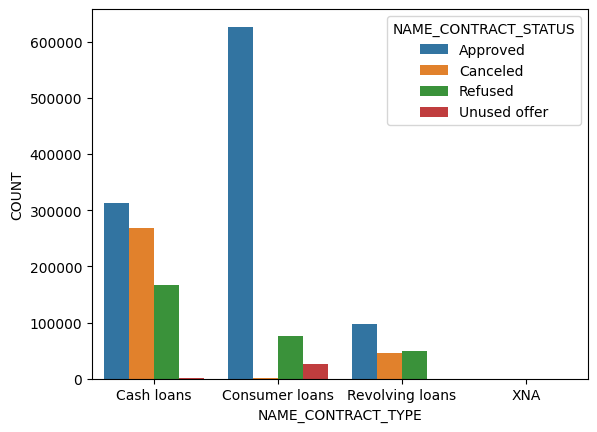

In [75]:
# Contract Status by Loan Type

# count number of application statuses per loan type
status_by_type = previous_application.groupby(['NAME_CONTRACT_TYPE', 'NAME_CONTRACT_STATUS'])['SK_ID_CURR'].count().reset_index()
# rename count of id's to 'COUNT'
status_by_type.rename(columns = {'SK_ID_CURR': 'COUNT'}, inplace=True)
print(status_by_type)

# create bar graph with x-axis as type of loan application, and y-axis as count, distinguished by application status
sns.barplot(data = status_by_type, x = 'NAME_CONTRACT_TYPE', y = 'COUNT', hue = 'NAME_CONTRACT_STATUS')